In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
%load_ext autoreload
%autoreload 2
%matplotlib widget

from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)

from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders_prince
from datetime import datetime
from amftrack.pipeline.launching.run_super import (
    run_parallel,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)
from amftrack.util.dbx import read_saved_dropbox_state,get_dropbox_folders_prince
import sys
import os

from amftrack.util.sys import get_dirname, temp_path
import pandas as pd
import ast
from scipy import sparse
import scipy.io as sio
import cv2
import imageio.v2 as imageio
import numpy as np
import scipy.sparse
import os
from time import time
from amftrack.pipeline.functions.image_processing.extract_skel import (
    extract_skel_new_prince,
    run_back_sub,
    bowler_hat,
)

from amftrack.util.sys import get_dates_datetime, get_dirname
import shutil
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs,
    Edge,
    Node
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    reconstruct_image_from_general,
    plot_full,
    plot_edge_color_value
)
from matplotlib import cm
from matplotlib.patches import Rectangle
from amftrack.transport.align_video_network import identify_nodes, selected_rectangle
from IPython.display import clear_output
import re
from amftrack.pipeline.development.high_mag_videos.plot_data import (
    plot_summary,
    save_raw_data,
)
import sys
import os
import pandas as pd
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
from tifffile import imwrite
from tqdm import tqdm
import scipy
import matplotlib as mpl
from pathlib import Path
from amftrack.pipeline.launching.run import (
    run_transfer,
)
from amftrack.pipeline.launching.run_super import run_parallel_transfer
import dropbox
from amftrack.util.dbx import upload_folder, download, read_saved_dropbox_state, save_dropbox_state, load_dbx, get_dropbox_folders_prince, get_dropbox_video_folders, download_video_folders_drop, download_analysis_folders_drop
from subprocess import call
import logging
import datetime
import glob
import json
from amftrack.pipeline.launching.run_super import run_parallel_flows
from amftrack.util.dbx import upload
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, MultiPolygon
from shapely import affinity
from random import randint
import cv2
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from amftrack.notebooks.P_experiment.helper import get_polygons, create_polygon,get_regions
from amftrack.pipeline.functions.image_processing.experiment_util import make_full_image,plot_full_video
from amftrack.pipeline.functions.post_processing.P_regions import *

mpl.rcParams['figure.dpi'] = 60


/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
plates = ["439_20230804"]

In [10]:
directory_targ = os.path.join(directory_scratch, "stitch_temp") + "/"
# directory_targ = directory_project

update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/1007 [00:00<?, ?it/s]

In [4]:
folders = all_folders.loc[all_folders['unique_id']==plates[0]]
folders = folders.loc[folders["/Analysis/nx_graph_pruned_width.p"] == True]

In [5]:
folders = folders.sort_values(by="datetime")

exp = Experiment(directory_targ)
i = 0
exp.load(folders.iloc[[0,-1]],suffix="_width")
for t in range(exp.ts):
    exp.load_tile_information(t)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2023-08-04 13:59:00
2023-08-07 01:53:00


In [7]:
densities = [get_length_density_in_region(exp,t,{'i':i})[1] for i in range(18)]

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/notebooks/P_experiment/helper.py:186: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  new_polygons.extend(list(split_result))
/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/notebooks/P_experiment/helper.py:186: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  new_polygons.extend(list(split_result))


0.0
0.0
0.0
0.0


/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:185: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:185: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.


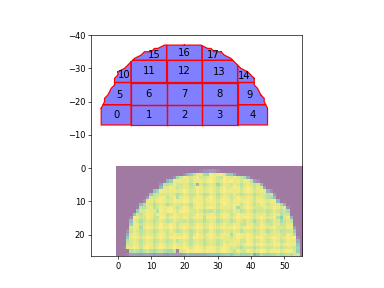

In [44]:
polygons = get_regions(exp,0)


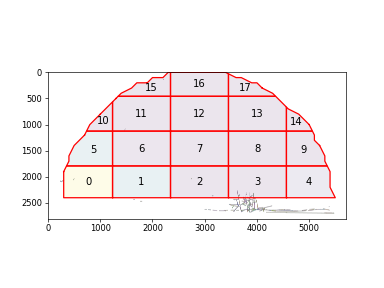

In [33]:
min_density = min(densities)
max_density = max(densities)
norm_densities = [(density - min_density) / (max_density - min_density) for density in densities]

# Create a colormap
colormap = plt.cm.get_cmap('viridis')  # Choose any available colormap
fig, ax = plt.subplots()

# Your code for image generation
t = 0
im, skel_im = make_full_image(
    exp,
    t,
    downsizing=10,
    dilation=5,
    edges=get_all_edges(exp, t)
)
ax.imshow(skel_im)

for i, (polygon, density) in enumerate(zip(polygons, norm_densities)):
    # Extract the x and y coordinates
    polygon = affinity.scale(polygon, xfact=100, yfact=100, origin=(0, 0))
    x, y = polygon.exterior.xy

    # Get the color corresponding to the density
    color = colormap(density)

    # Plot the polygon
    ax.fill(x, y, alpha=0.1, fc=color, label=f"Polygon {i}")
    ax.plot(x, y, 'r')
    centroid = polygon.centroid
    ax.text(centroid.x, centroid.y, str(i), fontsize=12, ha='center', va='center')

plt.show()

In [2]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from helper import *
from amftrack.notebooks.P_experiment.helper import get_polygons
%load_ext autoreload
%autoreload 2

%matplotlib widget

# Read the Excel file
path_excel = 'summary.xlsx'
df = pd.read_excel(path_excel)
df['date_from_unique_id'] = pd.to_datetime(df['unique_id'].str.split('_').str[1], format='%Y%m%d')
    
# Convert 'day' column to datetime
df['day'] = pd.to_datetime(df['day'], format='%Y%m%d')  # Update the format as necessary
df['day_start'] = pd.to_datetime(df['start'], format='%Y%m%d')  # Update the format as necessary

df['time_elapsed'] = df['day'] - df['day_start']
df['time_elapsed_day'] = df['time_elapsed'].dt.days
df['time_since_crossing'] = df['day'] - df['date_from_unique_id']
df['time_since_crossing_day'] = df['time_since_crossing'].dt.days
df['time_before_crossing_day'] = df['time_elapsed_day']-df['time_since_crossing_day']
df['treatment'] = df['treatment'].fillna('none')


grouped = df.groupby(['plate', 'type',"time_elapsed_day","time_since_crossing_day","treatment",'time_before_crossing_day']).agg({'totP (ug)': 'sum', 'wet weight': 'sum','dry weight' : "sum"}).reset_index()
grouped['C_P'] = grouped['totP (ug)'] / grouped['wet weight']
grouped['P_content'] = grouped['totP (ug)'] / grouped['dry weight']

df['C_P'] = df['totP (ug)'] / df['wet weight']
df['P_content'] = df['totP (ug)'] / df['dry weight']



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


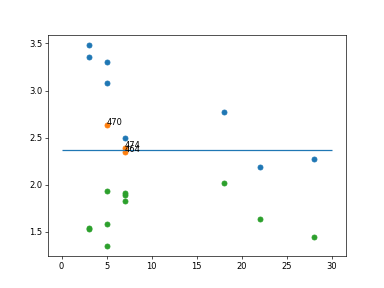

In [3]:
roots = grouped[grouped['type']=='agar']
roots = roots[roots['treatment']=='100P']

roots = roots[roots['plate']!=431]

fig,ax = plt.subplots()
ax.scatter(roots['time_since_crossing_day'],roots['totP (ug)']/roots['wet weight'])
roots = grouped[grouped['type']=='agar']
roots = roots[roots['treatment']=='0P']
ax.scatter(roots['time_since_crossing_day'],roots['totP (ug)']/roots['wet weight'])
for index,row in roots.iterrows():
    ax.text(row['time_since_crossing_day'],row['C_P'],row['plate'])
roots = grouped[grouped['type']=='rootagar']

roots = roots[roots['plate']!=431]
ax.scatter(roots['time_since_crossing_day'],roots['totP (ug)']/roots['wet weight'])

mean0P = np.median(df[df['type']=='agar0P']['C_P'])
ax.hlines(mean0P,0,30)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2023-08-02 11:47:00
2023-08-07 09:45:00


/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/notebooks/P_experiment/helper.py:186: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  new_polygons.extend(list(split_result))
/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/notebooks/P_experiment/helper.py:186: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  new_polygons.extend(list(split_result))


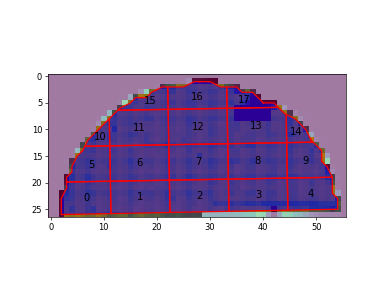

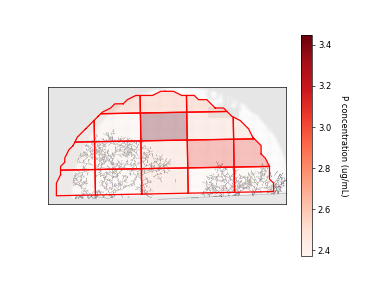

In [55]:
from matplotlib.cm import ScalarMappable
df = pd.read_excel(path_excel)
df['unique_id']=df['unique_id'].replace('470_20230802',"470_20230709")

df = df[df['type'] != 'root']
df = df[df['type'] != 'rootagar']
df['pos'] = df['Sample_name'].str.split('-').str.get(1).astype(int)
df['C_P'] = df['totP (ug)']/df['wet weight'] 
basic_mapping = {
    1: (0, 0), 2: (0, 1), 3: (0, 2), 4: (0, 3), 5: (0, 4),
    6: (1, 0), 7: (1, 1), 8: (1, 2), 9: (1, 3), 10: (1, 4),
    11: (2, 0), 12: (2, 1), 13: (2, 2), 14: (2, 3), 15: (2, 4),
    16: (3, 1), 17: (3, 2), 18: (3, 3)
}

# Mapping for "coarse" to "basic"
coarse_to_basic_mapping = {
    1: [1, 2],
    2: [3, 8],
    3: [4, 5],
    4: [6, 7],
    5: [9, 10],
    6: [11, 12],
    7: [13],
    8: [14, 15],
    9: [16, 17, 18]
}

# Mapping for "simple" to "basic"
simple_to_basic_mapping = {
    0: list(range(1, 11)),
    1: list(range(11, 19))
}
colormap = plt.cm.get_cmap('Reds')  # Choose any available colormap
vmin=mean0P
vmax=3.45
sm = ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
# Initialize plot
plt.close("all")
for idx, unique_id in enumerate(list(df['unique_id'].unique())[-1:]):
    if type(unique_id) ==str:
        folders = all_folders.loc[all_folders['unique_id']==unique_id]
        folders = folders.loc[folders["/Analysis/nx_graph_pruned_width.p"] == True]
        folders = folders.sort_values(by="datetime")

        exp = Experiment(directory_targ)
        exp.load(folders.iloc[[0,-2]],suffix="_width")
        for t in range(exp.ts):
            exp.load_tile_information(t)
        polygons = get_regions(exp,0)
#         t = -1
#         im, skel_im = make_full_image(
#             exp,
#             t,
#             downsizing=10,
#             dilation=5,
#             edges=get_all_edges(exp, t)
#         )
        fig,ax = plt.subplots()
        cbar = fig.colorbar(sm, ax=ax)
        cbar.set_label('P concentration (ug/mL)', rotation=270, labelpad=20)
        img = im

        # Display the image
        ax.imshow(np.array(skel_im), cmap='Greens')
        ax.imshow(np.array(img), cmap='gray',alpha= 0.1)
        
        plate_df = df[df['unique_id'] == unique_id]

        # Create an empty 4x5 grid (for "basic" arrangement, adjust as needed)
        grid = np.zeros((4, 5))

        for i, row in plate_df.iterrows():
            arrangement = row['arrangement']
            pos = row['pos']
            totP = row['C_P']

            if arrangement == 'basic':
                draw_polygon(pos-1,totP,ax,polygons)

            elif arrangement == 'simple':
                for basic_pos in simple_to_basic_mapping[pos]:
                    draw_polygon(basic_pos-1,totP,ax,polygons)

            elif arrangement == 'coarse':
                for basic_pos in coarse_to_basic_mapping[pos]:
                    draw_polygon(basic_pos-1,totP,ax,polygons)
        # Plotting the grid

        # cbar = fig.colorbar(c, ax=ax)
        # cbar.set_label('P contration (ug/mL)', rotation=270, labelpad=20)
        # ax.set_title(f'Plate {unique_id}')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.savefig(f"plots/{unique_id}.png",dpi = 300)        
    # break
# plt.show()

In [12]:
unique_id

'470_20230802'

In [49]:
mean0P*28

66.37893607668418

In [46]:
def draw_polygon(pos,totP,ax,polygons):
    polygon = polygons[pos]
    polygon = affinity.scale(polygon, xfact=100, yfact=100, origin=(0, 0))
    x, y = polygon.exterior.xy

    # Get the color corresponding to the density
    relativeP = (totP-vmin)/(vmax-vmin)
    color = colormap(relativeP)

    # Plot the polygon
    ax.fill(x, y, alpha=0.3, fc=color)
    ax.plot(x, y, 'r')

In [43]:
def get_regions(exp,t):
    im, skel_im = make_full_image(
        exp,
        t,
        downsizing=1000,
        dilation=5,
        edges=[])
    image = (im).astype(np.uint8)

    scale_unit = 1 / 1.725

    # Compute overlap
    def compute_overlap(params):
        x, y, angle = params
        polygon, R, t = create_polygon(x, y, angle, scale_unit)

        # Draw the polygon on a black image
        polygon_img = np.zeros_like(image)
        cv2.fillPoly(polygon_img, [polygon], 255)
        # Compute overlap between the image and the polygon
        overlap = np.sum((image / 255) * (polygon_img / 255))
        # Return negative overlap as we're using the minimize function
        return -overlap

    # Initial guess for the parameters
    bounds = [(0,30),(20,40),(240,300)]
    deltas = np.array([20, 20, 30])
    init_params = [10, 30, 270]
    simplex = [init_params]
    for i in range(len(init_params)):
        new_point = np.copy(init_params)
        new_point[i] += deltas[i]
        simplex.append(new_point)

    # Convert to numpy array for use in scipy.minimize
    initial_simplex = np.array(simplex)
    # Bounds for the parameters ([x_min, x_max], [y_min, y_max], [angle_min, angle_max], [scale_min, scale_max])

    # Perform optimization to minimize overlap
    result = minimize(compute_overlap, init_params, method='Nelder-Mead', options={'initial_simplex': initial_simplex})
    optimal_params = result.x

    # Draw the optimized polygon on the image
    optimal_polygon, angle, translation_vector = create_polygon(*optimal_params, scale_unit)
    # cv2.fillPoly(image, [optimal_polygon], 127)
    polygon_img = np.zeros_like(image)
    cv2.fillPoly(polygon_img, [optimal_polygon], 255)
    polygons = get_polygons(*optimal_params, scale_unit)

    centroids = [(polygon.centroid.y, polygon.centroid.x) for polygon in polygons]
    sorted_polygons = [polygon for centroid, polygon in sorted(zip(centroids, polygons))]
    lists = [sorted_polygons[13:18], sorted_polygons[8:13], sorted_polygons[3:8], sorted_polygons[:3]]
    final_sort = []
    for pre_sort in lists:
        centroids = [(polygon.centroid.x, polygon.centroid.y) for polygon in pre_sort]
        sorted_polygons_final = [polygon for centroid, polygon in sorted(zip(centroids, pre_sort))]
        final_sort += sorted_polygons_final
    fig, ax = plt.subplots()
    
    # Display the image with matplotlib
    ax.imshow(image)
    ax.imshow(polygon_img, cmap="Reds", alpha=0.5)
    for i, polygon in enumerate(final_sort):
        # Extract the x and y coordinates
        x, y = polygon.exterior.xy
    
        # Plot the polygon
        ax.fill(x, y, alpha=0.5, fc='b', label=f"Polygon {i}")
        ax.plot(x, y, 'r')
    
        # Plot the index at the centroid
        centroid = polygon.centroid
        ax.text(centroid.x, centroid.y, str(i), fontsize=12, ha='center', va='center')
    return(final_sort)


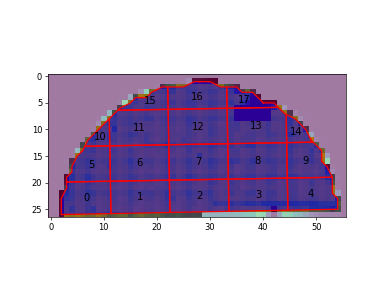

In [44]:
polygons = get_regions(exp,0)
